# AN2VEC colors results

In [1]:
import glob
from collections import defaultdict
import re
import itertools

import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
results = defaultdict(list)
pattern = re.compile("julia-nnodes=([^-]+)-l1=([^-]+)-decadj=([^-]+)/"
                     "([^-]+)-correlation=([^-]+)-dimxi=([^-]+)-sample=([^-]+).npz")

for fname in glob.glob("../../data/behaviour/colors/*/*.npz"):
    research = re.search(pattern, fname)
    if research is None:
        print("No match: {}".format(fname))
        continue
    nnodes, l1, decadj, model, correlation, dimξ, sample = research.groups()
    history = np.load(fname)
    nepochs = None
    for k, v in history.items():
        if nepochs is None:
            nepochs = len(v)
        else:
            assert nepochs == len(v)
        results[k].extend(v)
    results['epoch'].extend(range(nepochs))
    results['nnodes'].extend(nepochs * [int(nnodes)])
    results['l1'].extend(nepochs * [l1])
    results['decadj'].extend(nepochs * [decadj])
    results['model'].extend(nepochs * [model])
    results['correlation'].extend(nepochs * [float(correlation)])
    results['dimξ'].extend(nepochs * [int(dimξ)])
    results['sample'].extend(nepochs * [int(sample)])

results = pd.DataFrame(results)

In [3]:
results['adj+feat'] = results['adj'] + results['feat']

best_total = results\
    .groupby(['nnodes', 'l1', 'decadj', 'model', 'correlation', 'dimξ', 'sample'])\
    .apply(lambda x: x.loc[x.total.idxmin()])\
    .reset_index(drop=True)
best_total_long = pd.melt(best_total,
                          id_vars=['nnodes', 'l1', 'decadj', 'model', 'correlation', 'dimξ', 'sample', 'epoch'],
                          var_name='loss', value_name='best total')

maxdimξ = best_total.dimξ.max()
loss_parts = ['adj', 'feat', 'adj+feat', 'total', 'reg', 'kl']
best_total_rel = best_total.copy()
best_total_rel[loss_parts] = best_total\
    .groupby(['nnodes', 'l1', 'decadj', 'model', 'correlation'])\
    .apply(lambda x: x / x[x.dimξ == maxdimξ].mean())[loss_parts]
best_total_rel_long = pd.melt(best_total_rel.reset_index(),
                              id_vars=['nnodes', 'l1', 'decadj', 'model', 'correlation', 'dimξ', 'sample', 'epoch'],
                              var_name='loss', value_name='best total')

Absolute

/home/sl/.conda/envs/base36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


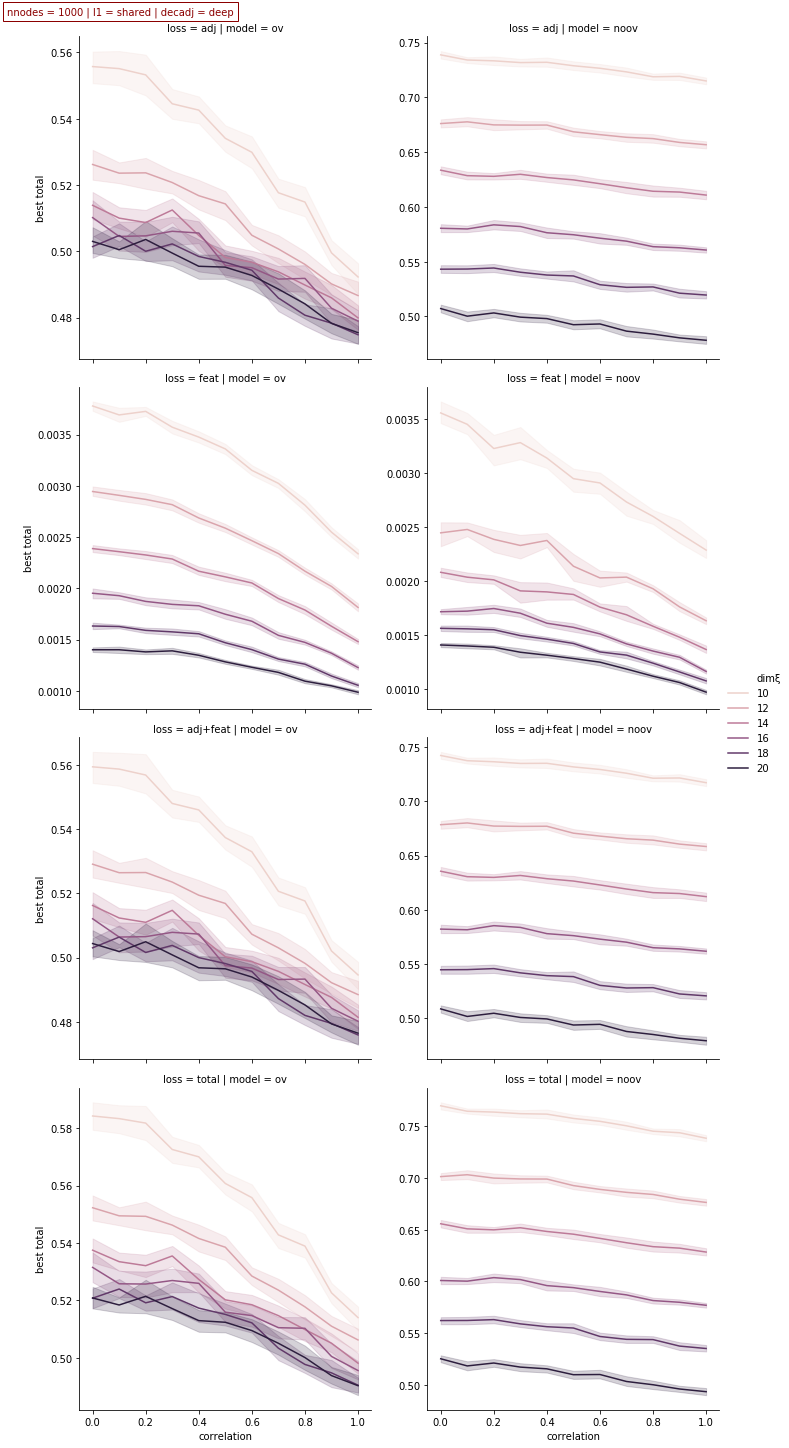

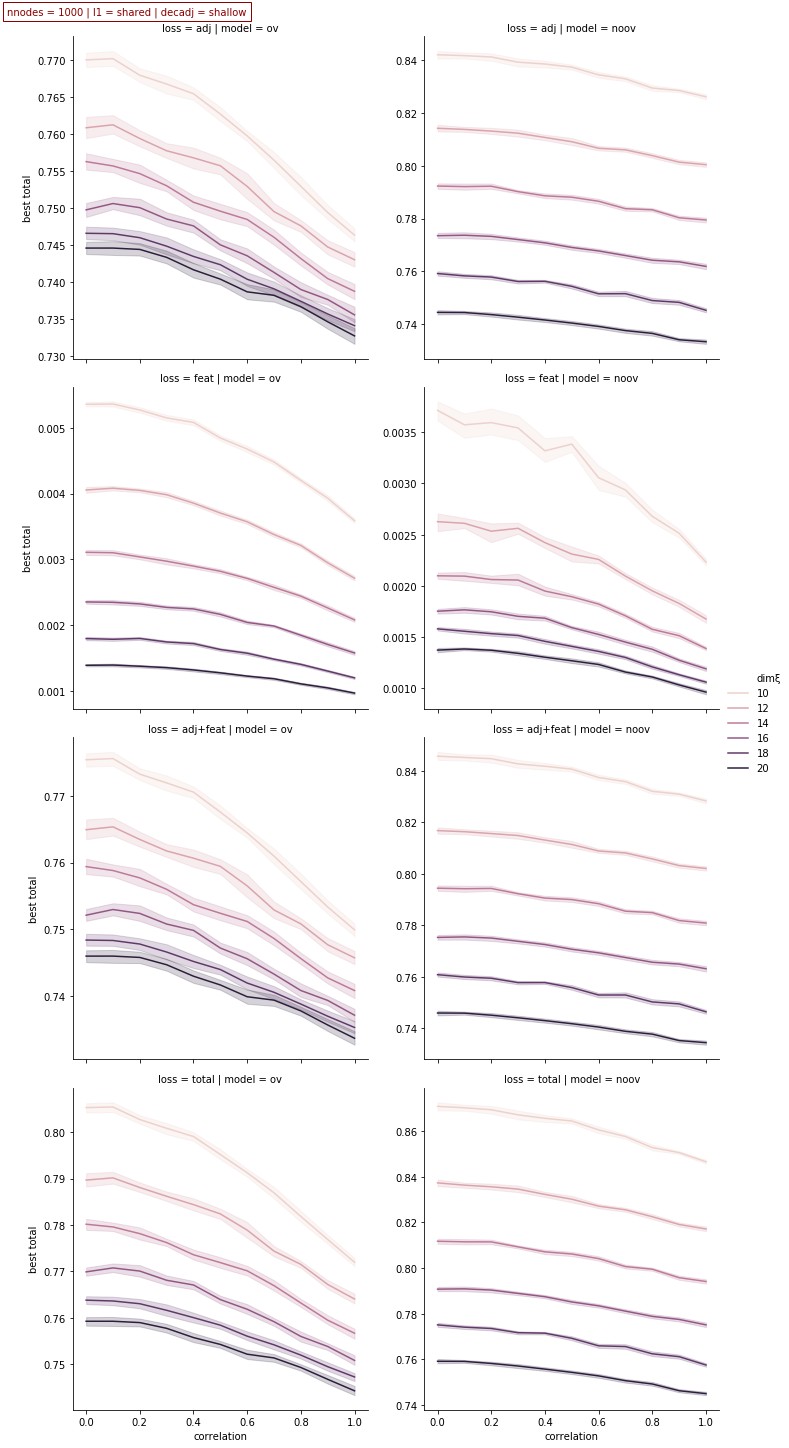

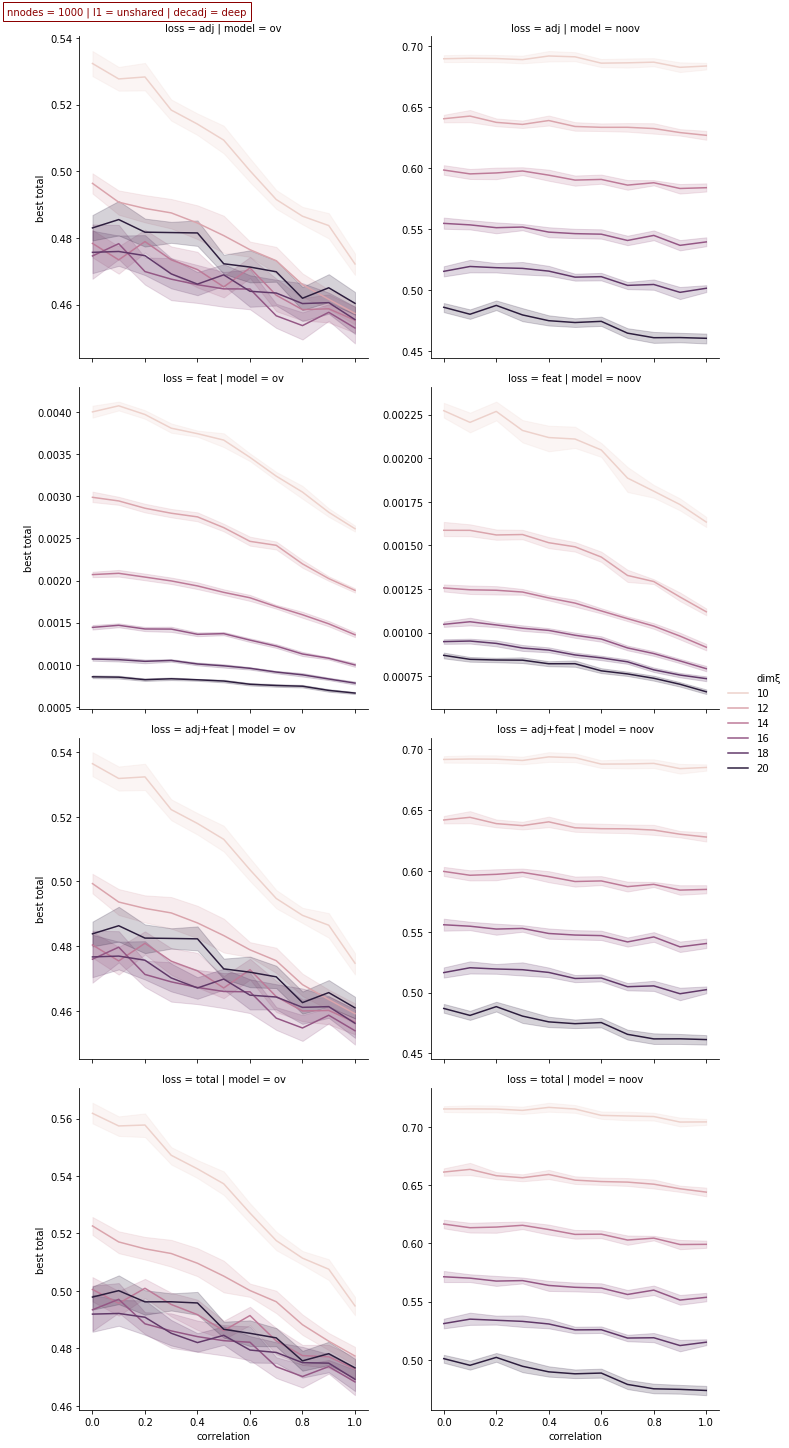

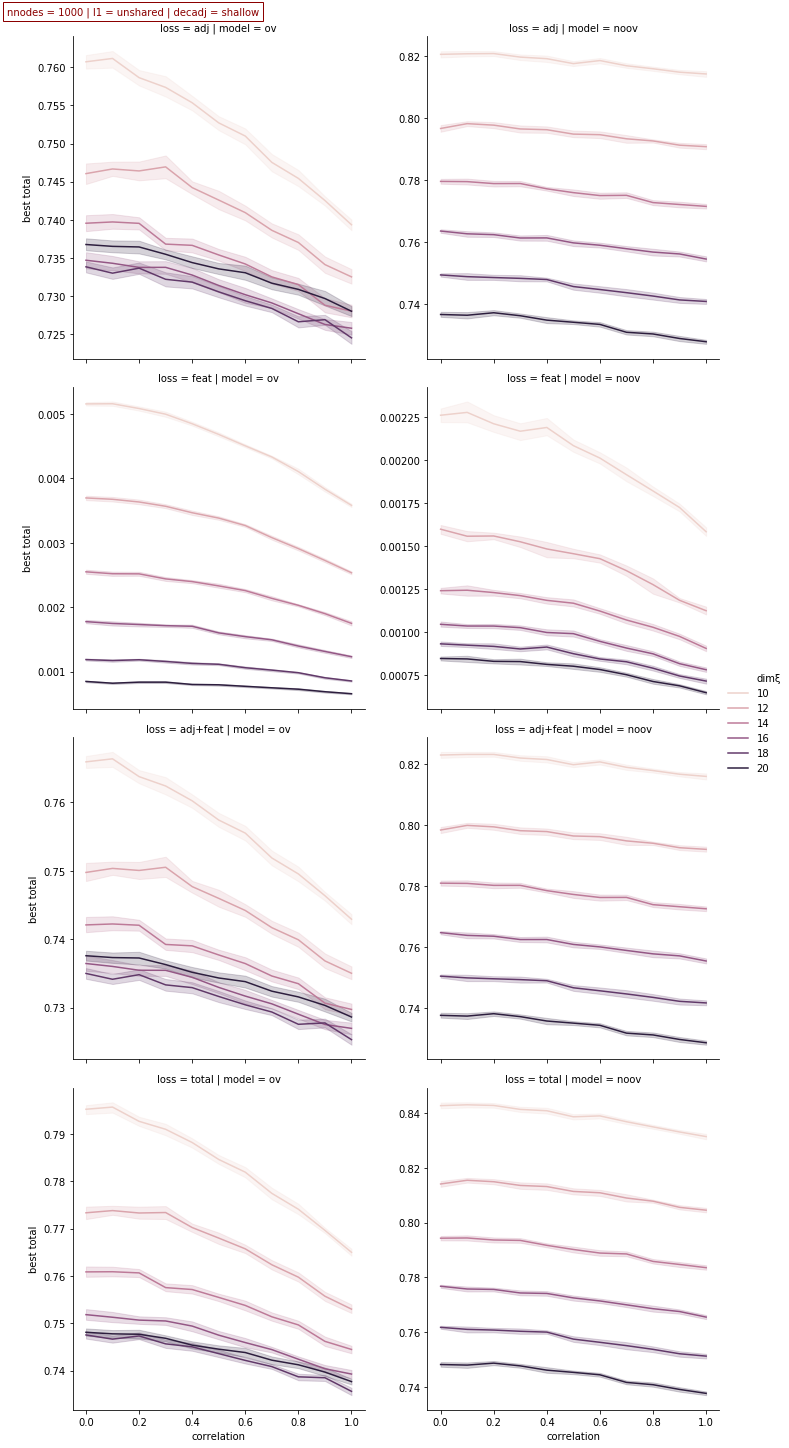

In [4]:
for nnodes, l1, decadj in itertools.product([1000], ['shared', 'unshared'], ['deep', 'shallow']):
    facet_grid = sb.relplot(x='correlation', y='best total',
                            hue='dimξ', col='model', col_order=['ov', 'noov'],
                            row='loss', row_order=['adj', 'feat', 'adj+feat', 'total'],
                            data=best_total_long[(best_total_long.nnodes == 1000)
                                                 & (best_total_long.l1 == l1)
                                                 & (best_total_long.decadj == decadj)],
                            kind='line', legend='full', facet_kws={'sharey': False})
    facet_grid.fig.text(0, 1, 'nnodes = {} | l1 = {} | decadj = {}'.format(nnodes, l1, decadj),
                        color='darkred', ha='left', va='center',
                        bbox={'edgecolor': 'darkred', 'facecolor': "#00000000"})

Relative

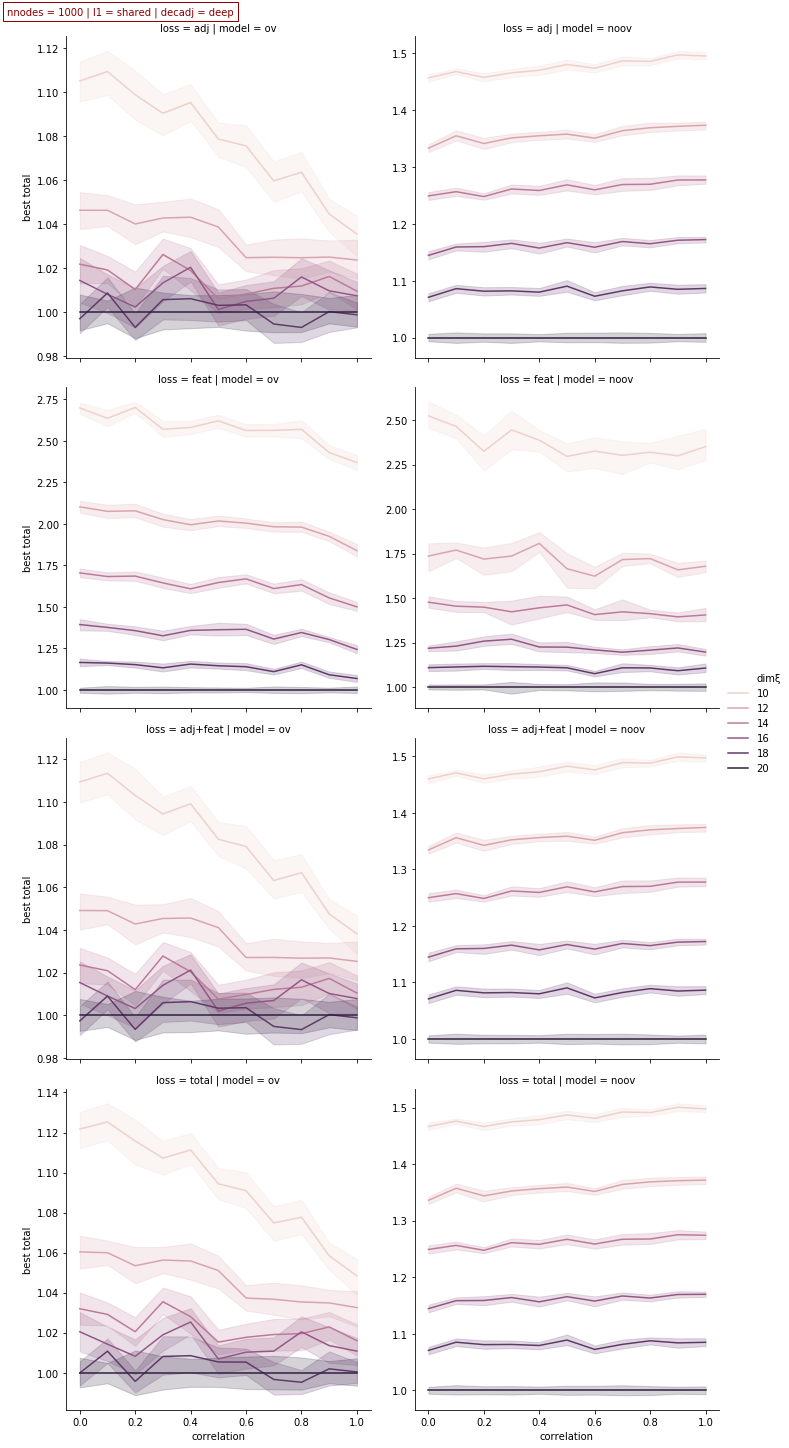

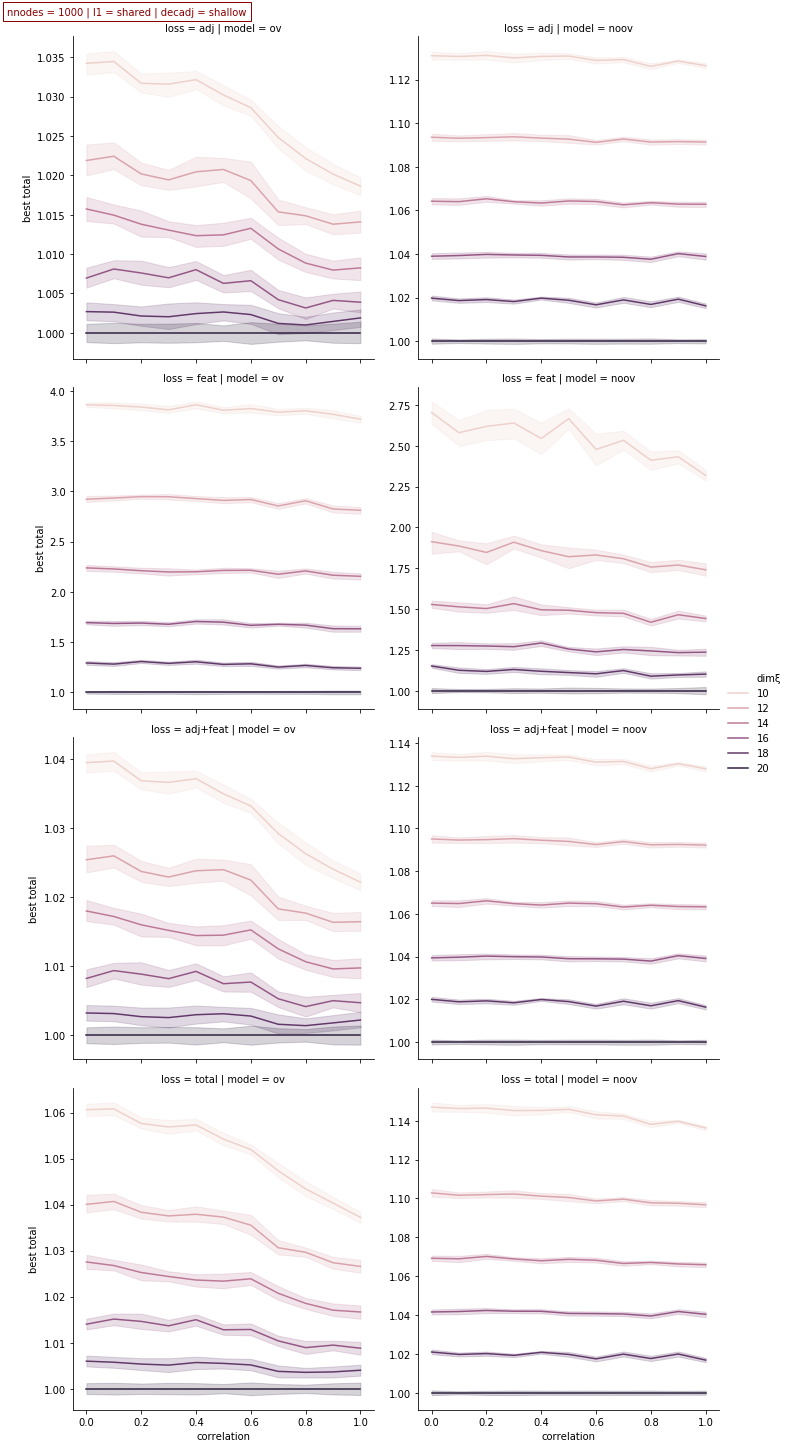

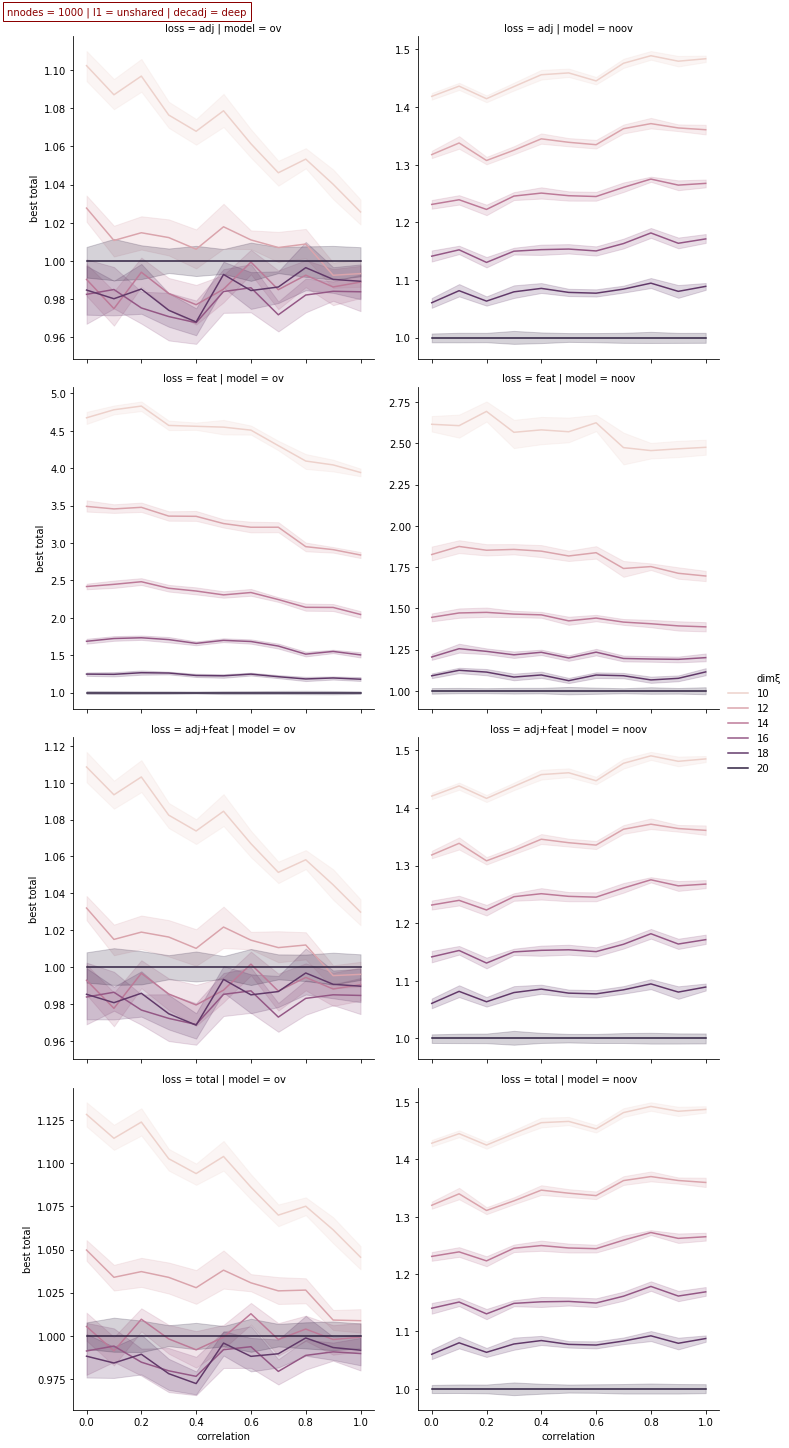

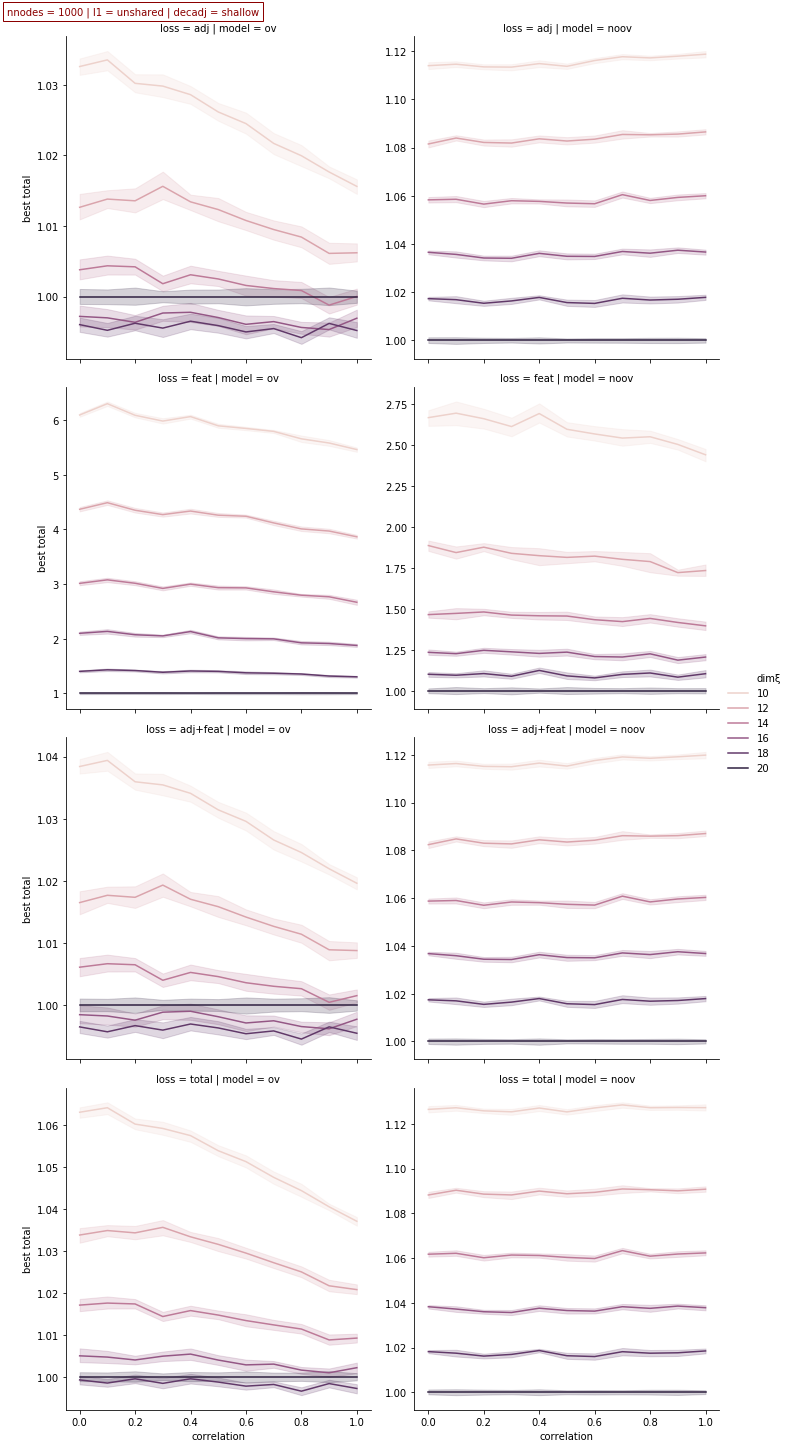

In [5]:
for nnodes, l1, decadj in itertools.product([1000], ['shared', 'unshared'], ['deep', 'shallow']):
    facet_grid = sb.relplot(x='correlation', y='best total',
                            hue='dimξ', col='model', col_order=['ov', 'noov'],
                            row='loss', row_order=['adj', 'feat', 'adj+feat', 'total'],
                            data=best_total_rel_long[(best_total_rel_long.nnodes == 1000)
                                                     & (best_total_rel_long.l1 == l1)
                                                     & (best_total_rel_long.decadj == decadj)],
                            kind='line', legend='full', facet_kws={'sharey': False})
    facet_grid.fig.text(0, 1, 'nnodes = {} | l1 = {} | decadj = {}'.format(nnodes, l1, decadj),
                        color='darkred', ha='left', va='center',
                        bbox={'edgecolor': 'darkred', 'facecolor': "#00000000"})